In [46]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt


# Analisis Exploratorio

El objetivo es ...

## Carga de data

In [23]:
path_hechos = os.path.join('..','data','clear','hechos_homicidios.csv')
path_victimas = os.path.join('..','data','clear','victimas_homicidios.csv')

In [24]:
hechos = pd.read_csv(path_hechos)
victimas = pd.read_csv(path_victimas)

In [26]:
hechos.head(5)

,id_hechos,n_victimas,fecha,anho,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victimas,acusado,Cruce_boolean
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,False
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,True


In [27]:
victimas.head(5)

,id_hechos,fecha,anho,mes,dia,rol,victimas,sexo,edad,fecha_fallecimiento,misma_fecha_accidente,rango_etario,semestre
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,True,joven,1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,True,adulto_mayor,1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,True,adulto,1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,True,joven,1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,False,joven,1


In [79]:
data = hechos.merge(victimas,on='id_hechos')

data.columns

Index(['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'fecha_y',
       'anho_y', 'mes_y', 'dia_y', 'rol', 'victimas_y', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre'],
      dtype='object')

In [81]:
data['tipo_de_calle'] == 'AUTOPISTA'

0        AVENIDA
1       GRAL PAZ
2        AVENIDA
3        AVENIDA
4        AVENIDA
         ...    
712      AVENIDA
713    AUTOPISTA
714      AVENIDA
715      AVENIDA
716        CALLE
Name: tipo_de_calle, Length: 717, dtype: object

## Relación entre rango etario y fecha de accidente
Vamos a analizar la distribucion de personas que mueren en el sitio

In [84]:
columnas = ['rango_etario','misma_fecha_accidente']

data[columnas].groupby(columnas).value_counts()

rango_etario  misma_fecha_accidente
adulto        False                     46
              True                     240
adulto_mayor  False                     69
              True                     141
joven         False                     33
              True                     165
menor         False                      2
              True                      21
Name: count, dtype: int64

In [75]:

data['rango_etario'].value_counts()

rango_etario
adulto          286
adulto_mayor    210
joven           198
menor            23
Name: count, dtype: int64

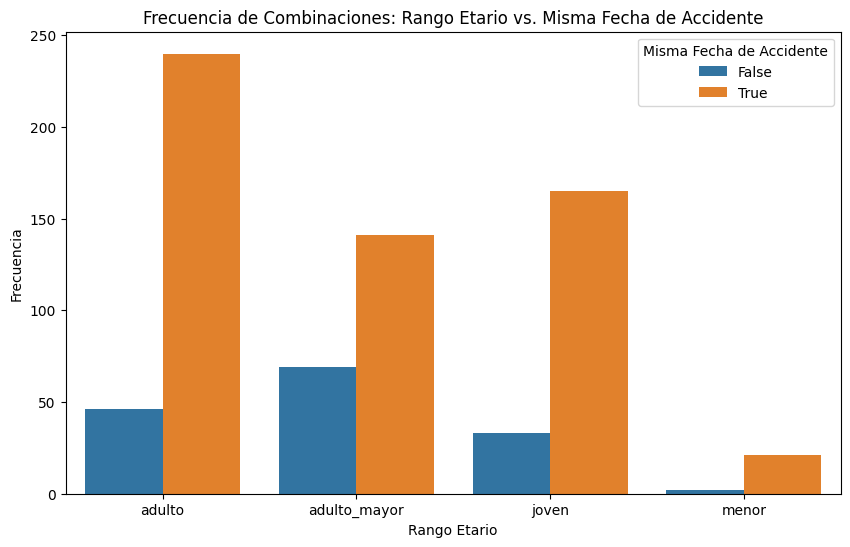

In [90]:

# Supongamos que 'data' es tu DataFrame y ya tienes las columnas definidas
columnas = ['rango_etario', 'misma_fecha_accidente']

# Crear el DataFrame con las frecuencias
frecuencias = data[columnas].groupby(columnas).size().reset_index(name='count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='rango_etario', y='count', hue='misma_fecha_accidente', data=frecuencias)

# Personalizar el gráfico
plt.title('Frecuencia de Combinaciones: Rango Etario vs. Misma Fecha de Accidente')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

# Mostrar el gráfico
plt.show()

## Cantidad de victimas por mes

In [107]:
data.groupby('mes_x').size()

mes_x
1     62
2     59
3     56
4     52
5     60
6     58
7     51
8     67
9     51
10    52
11    68
12    81
dtype: int64

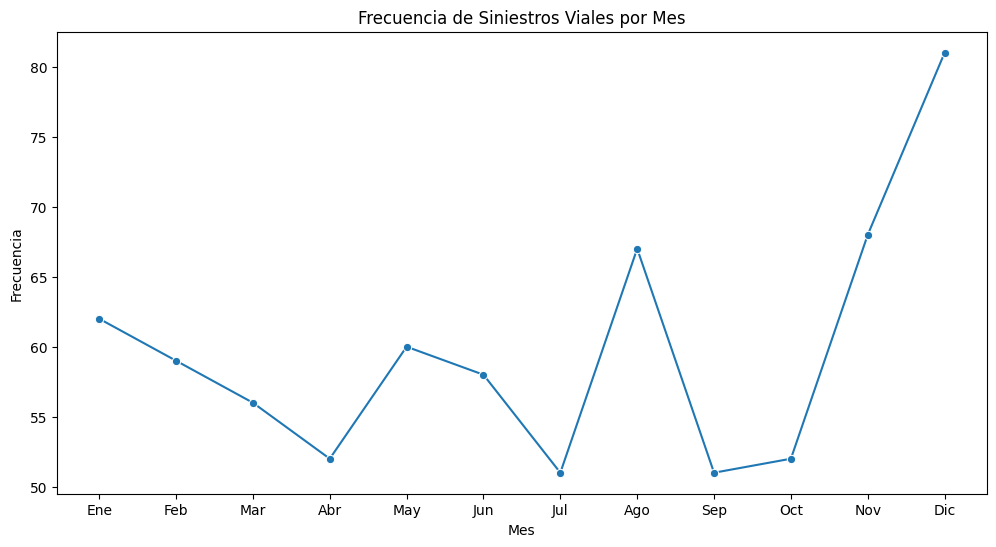

In [111]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot( data.groupby('mes_x').size(), marker='o')

# Personalizar el gráfico
plt.title('Frecuencia de Siniestros Viales por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

## Victimas por semestre

In [132]:
data.groupby(['anho_x','semestre',]).size().values

array([65, 81, 69, 71, 70, 79, 57, 47, 31, 50, 55, 42], dtype=int64)